## Titanic

## Data analyzing and preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('../../data/train.csv')
data_test = pd.read_csv('../../data/test.csv')

data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
print(data_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

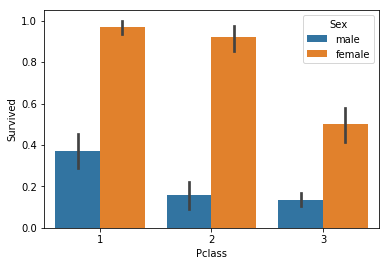

In [6]:
sns.barplot(x=data_train['Pclass'], y=data_train['Survived'],hue=data_train['Sex']);

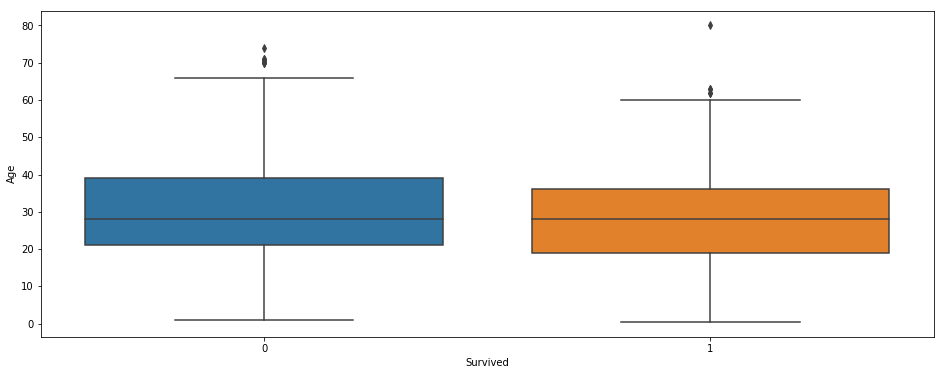

In [7]:
plt.figure(figsize=(16, 6))
sns.boxplot(y=data_train['Age'], x=data_train['Survived']);

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
survived_people = float(data_train[data_train['Survived'] == 1]['Survived'].count())

In [11]:
dead_people = float(data_train[data_train['Survived'] == 0]['Survived'].count())

In [12]:
all_people = float(data_train['Survived'].count())

In [13]:
def percentage(part, whole):
    return 100 * part/whole
percentage(survived_people,all_people)

38.38383838383838

In [14]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data_train['Name'].nunique()

891

In [16]:
data_train['Cabin'].nunique()

147

In [17]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


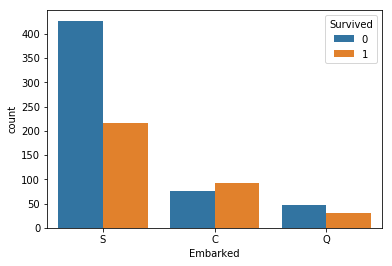

In [18]:
sns.countplot(x=data_train['Embarked'],hue=data_train['Survived']);

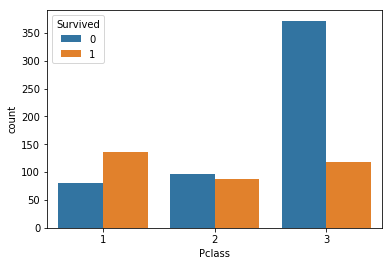

In [19]:
sns.countplot(x=data_train['Pclass'],hue=data_train['Survived']);

The Most Survived:
    * Sex = Female 
    * 20 < Age < 40
    * PClass != 3 mostly PClass = 1
    * Embarked != S

Drop:
    * Name
    * PassengerId
    * Ticket

In [20]:
data_train.drop(columns='PassengerId', axis=1, inplace=True)
data_train.drop(columns='Ticket', axis=1, inplace=True)

In [21]:
data_train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [22]:
data_test.drop(columns='PassengerId', axis=1, inplace=True)
data_test.drop(columns='Ticket', axis=1, inplace=True)

In [23]:
data_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


**Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

In [24]:
data_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

In [25]:
data_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [26]:
data_train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
data_train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [28]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [30]:
combine = [data_train,data_test]
#extract prefixes
for dataset in combine:
    dataset['Prefix'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data_train['Prefix'], data_train['Sex'])

Sex,female,male
Prefix,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [31]:
# add prefix column into dataset
for dataset in combine:
    dataset['Prefix'] = dataset['Prefix'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Prefix'] = dataset['Prefix'].replace('Mlle', 'Miss')
    dataset['Prefix'] = dataset['Prefix'].replace('Ms', 'Miss')
    dataset['Prefix'] = dataset['Prefix'].replace('Mme', 'Mrs')
    
data_train[['Prefix', 'Survived']].groupby(['Prefix'], as_index=False).mean()

,Prefix,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [32]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Prefix'] = dataset['Prefix'].map(title_mapping)
    dataset['Prefix'] = dataset['Prefix'].fillna(0)

data_train['Prefix'].describe()

count    891.000000
mean       1.728395
std        1.030039
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Prefix, dtype: float64

In [33]:
data_train.shape

(891, 11)

In [34]:
# drop name column
data_train.drop(columns='Name', axis=1, inplace=True)
data_test.drop(columns='Name', axis=1, inplace=True)

In [35]:
data_test.shape

(418, 9)

In [36]:
# convert female/male into 1/0
gender = {'male': 0,'female': 1} 
data_train['Sex'] = [gender[item] for item in data_train['Sex']] 

In [37]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,71.2833,C85,C,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,53.1000,C123,S,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,1


C:\Users\Diana_Aimbetova\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


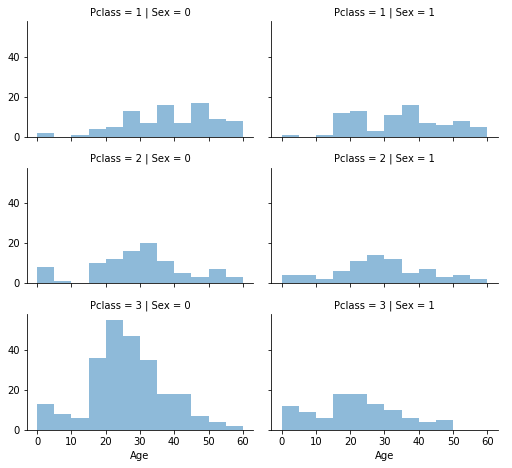

In [38]:
grid = sns.FacetGrid(data_train, row='Pclass', col='Sex', size=2.2, aspect=1.6);
bins = np.arange(0, 65, 5)
grid.map(plt.hist, 'Age', alpha=.5, bins=bins);
grid.add_legend();

In [39]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
for dataset in combine:
    for y in range(0,2):
        for z in range(0,3):
            guess_df = data_train[(data_train['Sex'] == y) & \
                                  (data_train['Pclass'] == z+1)]['Age']
            age_guess = guess_df.median(skipna=True)
            guess_ages[y,z] = int( age_guess/0.5 + 0.5 ) * 0.5
    for y in range(0,2):
        for z in range(0,3):
            dataset.loc[(dataset['Age'].isna()) & (dataset['Sex'] == y) & (dataset['Pclass'] == z+1),\
                    'Age'] = guess_ages[y,z]
            print(dataset.loc[(dataset['Age'].isna()) & (dataset['Sex'] == y) & (dataset['Pclass'] == z+1),\
                    'Age'])
    dataset['Age'] = dataset['Age'].fillna(guess_ages[y,z]).astype(int)
data_test['Age'].isna().sum()

Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)
Series([], Name: Age, dtype: float64)


0

In [41]:
combine = [data_train, data_test]

In [42]:
data_test[data_test['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix


In [43]:

data_test['Sex'] = [gender[item] for item in data_test['Sex']] 

In [44]:
data_test[data_test.index==10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
10,3,0,21,0,0,7.8958,NaN,S,1


In [45]:
data_test[data_test.index==22]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
22,1,1,21,0,0,31.6833,NaN,S,3


In [46]:
data_test[data_test.index==29]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
29,3,0,21,2,0,21.6792,NaN,C,1


In [47]:
data_test[data_test.index==33]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
33,3,1,21,1,2,23.45,NaN,S,3


In [48]:
data_test[data_test.index==36]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
36,3,1,21,0,0,8.05,NaN,S,2


In [49]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,0,3,0,22,1,0,7.2500,NaN,S,1
1,1,1,1,38,1,0,71.2833,C85,C,3
2,1,3,1,26,0,0,7.9250,NaN,S,2
3,1,1,1,35,1,0,53.1000,C123,S,3
4,0,3,0,35,0,0,8.0500,NaN,S,1


In [50]:
data_train['Cabin'].nunique()

147

In [51]:
data_train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [52]:
data_train['Cabin'].sample(5)

699    F G63
359      NaN
163      NaN
15       NaN
834      NaN
Name: Cabin, dtype: object

In [53]:
data_train['Age'].describe()

count    891.000000
mean      29.072952
std       13.326339
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
ages_bin = pd.cut(data_train['Age'],5)

In [55]:
data_train['Ages_bin'] = ages_bin

In [56]:
data_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix,Ages_bin
522,0,3,0,25,0,0,7.2250,NaN,C,1,"(16.0, 32.0]"
39,1,3,1,14,1,0,11.2417,NaN,C,2,"(-0.08, 16.0]"
486,1,1,1,35,1,0,90.0000,C93,S,3,"(32.0, 48.0]"
695,0,2,0,52,0,0,13.5000,NaN,S,1,"(48.0, 64.0]"
158,0,3,0,25,0,0,8.6625,NaN,S,1,"(16.0, 32.0]"


In [57]:
data_train[['Ages_bin', 'Survived']].groupby(['Ages_bin'], as_index=False).mean().sort_values(ascending=True, by='Ages_bin')

,Ages_bin,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [58]:
data_test['Ages_bin'] = pd.cut(data_test['Age'],5)

In [59]:
combine = [data_train,data_test]

In [60]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
data_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix,Ages_bin
879,1,1,1,3,0,1,83.1583,C50,C,3,"(48.0, 64.0]"
231,0,3,0,1,0,0,7.7750,NaN,S,1,"(16.0, 32.0]"
323,1,2,1,1,1,1,29.0000,NaN,S,3,"(16.0, 32.0]"
189,0,3,0,2,0,0,7.8958,NaN,S,1,"(32.0, 48.0]"
328,1,3,1,1,1,1,20.5250,NaN,S,3,"(16.0, 32.0]"


In [61]:
data_train.drop('Ages_bin',axis=1,inplace=True)

In [62]:
data_test.drop('Ages_bin',axis=1,inplace=True)

In [63]:
combine = [data_train,data_test]

In [64]:
data_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
24,0,3,1,0,3,1,21.0750,NaN,S,2
832,0,3,0,1,0,0,7.2292,NaN,C,1
295,0,1,0,2,0,0,27.7208,NaN,C,1
403,0,3,0,1,1,0,15.8500,NaN,S,1
876,0,3,0,1,0,0,9.8458,NaN,S,1


In [65]:
data_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
Prefix        int64
dtype: object

In [66]:
for dataset in combine:
    dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1
data_train[['Family_size','Survived']].groupby(by='Family_size', as_index=False).mean().sort_values(ascending=False, by='Survived')

,Family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [67]:
for dataset in combine:
    dataset['Is_alone'] = 0
    dataset.loc[dataset['Family_size'] == 1, 'Is_alone'] = 1
data_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix,Family_size,Is_alone
144,0,2,0,1,0,0,11.5000,NaN,S,1,1,1
599,1,1,0,3,1,0,56.9292,A20,C,5,2,0
685,0,2,0,1,1,2,41.5792,NaN,C,1,4,0
7,0,3,0,0,3,1,21.0750,NaN,S,4,5,0
769,0,3,0,1,0,0,8.3625,NaN,S,1,1,1


In [68]:
data_train[['Is_alone','Survived']].groupby(by='Is_alone', as_index=False).mean().sort_values(ascending=False,by='Survived')

,Is_alone,Survived
0,0,0.505650
1,1,0.303538


In [69]:
for dataset in combine:
    dataset.drop(['Family_size', 'SibSp', 'Parch'],axis=1,inplace = True)

In [70]:
data_train.sample(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
708,1,1,1,1,151.5500,NaN,S,2,1
722,0,2,0,2,13.0000,NaN,S,1,1
555,0,1,0,3,26.5500,NaN,S,1,1
710,1,1,1,1,49.5042,C90,C,2,1
642,0,3,1,0,27.9000,NaN,S,2,0


In [71]:
combine = [data_train,data_test]

In [72]:
freq_port = data_train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [73]:
data_train[data_train['Embarked'].isna()]

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
61,1,1,1,2,80.0,B28,NaN,2,1
829,1,1,1,3,80.0,B28,NaN,3,1


In [74]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
data_train[['Embarked','Survived']].groupby(by='Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [75]:
embarked_dict = {'C':0,'Q':1,'S':2}
for dataset in combine:
    dataset['Embarked'] = [embarked_dict[item] for item in dataset['Embarked']]

In [76]:
data_train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
0,0,3,0,1,7.2500,NaN,2,1,0
1,1,1,1,2,71.2833,C85,0,3,0
2,1,3,1,1,7.9250,NaN,2,2,1
3,1,1,1,2,53.1000,C123,2,3,0
4,0,3,0,2,8.0500,NaN,2,1,1


In [77]:
data_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin       687
Embarked      0
Prefix        0
Is_alone      0
dtype: int64

In [103]:
data_train[['Cabin','Survived']].groupby(by='Cabin',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Cabin,Survived
0,0,0.757576
1,1,0.750000
2,2,0.744681
3,3,0.615385
4,4,0.593220
5,5,0.500000
6,6,0.466667
7,7,0.299854
8,8,0.000000


In [82]:
data_train['Cabin'] = data_train['Cabin'].fillna('N')
data_train['Cabin']  = data_train['Cabin'] .apply(lambda a: a[0])

In [87]:
data_test['Cabin'] = data_test['Cabin'].fillna('N')
data_test['Cabin']  = data_test['Cabin'] .apply(lambda a: a[0])

In [105]:
data_test[data_test['Cabin'].isna()]

,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone


In [109]:
data_test.sample(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
296,2,1,0,41.5792,7,0,2,0
42,3,0,2,7.8500,7,2,1,1
94,1,0,1,26.0000,7,0,1,1
48,1,1,3,76.2917,0,0,3,1
136,3,0,1,7.2250,7,0,1,1


In [99]:
combine = [data_train,data_test]

In [101]:
cabins_dict = {'D':0, 'E':1, 'B':2, 'F':3, 'C':4,'G':5, 'A':6, 'N':7, 'T':8}

In [108]:
data_test['Cabin'] = [cabins_dict[item] for item in data_test['Cabin']]

In [ ]:
data_train['Cabin'] = [cabins_dict[item] for item in data_train['Cabin']]

In [110]:
data_train['FareBand'] = pd.qcut(data_train['Fare'],4)
data_train[['FareBand','Survived']].groupby('FareBand',as_index=False).mean().sort_values(by='Survived',ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [111]:
data_test['FareBand'] = pd.qcut(data_test['Fare'],4)

In [112]:
combine = [data_train,data_test]

In [133]:
for dataset in combine:
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
data_train = data_train.drop(['FareBand'], axis=1)
data_test = data_test.drop(['FareBand'], axis=1)
    
data_train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
0,0,3,0,1,3,7,2,1,0
1,0,0,0,0,3,0,0,0,0
2,1,3,1,1,3,7,2,2,1
3,0,0,0,0,3,0,0,0,0
4,0,3,0,2,3,7,2,1,1


In [130]:
data_test['Fare'] = data_test['Fare'].astype('float64')

In [131]:
data_test['Fare'].dtypes

dtype('float64')

In [134]:
data_test.head(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
0,3,0,2,3,7,1,1,1
1,3,1,2,3,7,2,3,0
2,2,0,3,3,7,1,1,1
3,3,0,1,3,7,2,1,1
4,3,1,1,3,7,2,3,0


## Model, predict and solve


In [135]:
y_train = data_train['Survived']
X_train = data_train.drop('Survived',axis=1)
X_test = data_test
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [145]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [146]:
log_reg.fit(X=X_train, y=y_train)

C:\Users\Diana_Aimbetova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, y_train) * 100, 2)
acc_log

83.05

In [152]:
log_reg.score(X_train, y_train)

0.8305274971941639

In [153]:
# функция для записи прогнозов в файл
def write_to_submission_file(predicted_labels, out_file,
                             target='Survived', index_label="PassengerId"):
    predicted_df = pd.DataFrame(list(predicted_labels.items()),
                      columns=['PassengerId','Survived'])
    predicted_df = predicted_df.set_index('PassengerId')
    predicted_df.to_csv(out_file)

In [157]:
df_test = pd.read_csv('../../data/test.csv')

In [158]:
predicted_labels = dict(zip(df_test['PassengerId'], y_pred))

In [159]:
write_to_submission_file(predicted_labels,'../competitions/logreg_2.csv')

In [161]:
coeff_df = pd.DataFrame(data_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(log_reg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.066131
7,Is_alone,0.832182
6,Prefix,0.759967
5,Embarked,0.083972
4,Cabin,0.021268
2,Age,-0.194241
0,Pclass,-0.225310
3,Fare,-0.904061


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Инициализируем случайный лес с 100 деревьями и сбалансированными классами 
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')

## Будем искать лучшие параметры среди следующего набора
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

## Делаем опять же стратифицированную k-fold валидацию. Инициализация которой должна у вас продолжать храниться в skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [164]:
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, 
                              scoring ='roc_auc', cv=skf,
                             verbose=True)


In [165]:
%%time
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s


Wall time: 12.1 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.8s finished


In [171]:
rf_grid_search.best_params_

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 3}

In [166]:
rf_grid_search.best_score_

0.8869945194572374

In [167]:
test_pred = rf_grid_search.predict(X_test)

In [169]:
predicted_labels = dict(zip(df_test['PassengerId'], test_pred))

In [170]:
write_to_submission_file(predicted_labels,'../competitions/random_forest_2.csv')

In [172]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

In [174]:
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

89.56

In [176]:
predicted_labels = dict(zip(df_test['PassengerId'], Y_pred))

In [180]:
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [182]:
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

88.1

In [183]:
predicted_labels = dict(zip(df_test['PassengerId'], Y_pred))
write_to_submission_file(predicted_labels,'../competitions/knn_1.csv')

In [184]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

parameters = {'max_features': [2, 3, 4], 'max_samples': [0.5, 0.7, 0.9], 
              "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100]}

In [185]:
bg = BaggingClassifier(LogisticRegression(class_weight='balanced'),
                       n_estimators=100, n_jobs=-1, random_state=42)
r_grid_search = RandomizedSearchCV(bg, parameters, n_jobs=-1, 
                                   scoring ='roc_auc', cv=skf, 
                                   n_iter=20, random_state=1,
                                  verbose=True)
r_grid_search = r_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


In [186]:
r_grid_search.best_score_

0.8190865013617544

In [191]:
r_grid_search.best_params_

{'max_samples': 0.5, 'max_features': 4, 'base_estimator__C': 10}

In [188]:
Y_pred = r_grid_search.predict(X_test)

In [189]:
predicted_labels = dict(zip(df_test['PassengerId'], Y_pred))

In [190]:
write_to_submission_file(predicted_labels,'../competitions/cv_1.csv')

In [192]:
data_train.sample(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Is_alone
474,0,3,1,1,3,7,2,2,1
99,0,2,0,2,3,7,2,1,0
878,0,3,0,1,3,7,2,1,1
776,0,3,0,1,3,3,1,1,1
312,0,2,1,1,3,7,2,3,0
